<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/ClassifyMultilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

In [3]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

In [5]:
X,y=make_multilabel_classification(n_samples=10000,n_features=10,n_classes=3,n_labels=2,random_state=1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from torch.utils.data import Dataset,DataLoader

In [15]:
class MultilabelDataset(Dataset):
    def __init__(self,X,y):
        super().__init__()
        self.X=torch.tensor(X,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]

In [29]:
train_loader=DataLoader(MultilabelDataset(X_train,y_train),batch_size=32,shuffle=True)
test_loader=DataLoader(MultilabelDataset(X_test,y_test),batch_size=X_test.shape[0],shuffle=False)

In [17]:
class MultilabelNetwork(nn.Module):
    def __init__(self,input_dim,hidden_size,output_dim):
        super().__init__()
        self.fc1=nn.Linear(input_dim,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_dim)
        self.sigmoid=nn.Sigmoid()
    def forward(self,x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.sigmoid(x)
        return x

In [45]:
loss=nn.BCELoss()
#loss=nn.BCEWithLogitsLoss()
input_dim=X.shape[1]
hidden_size=64
output_dim=y.shape[1]
model=MultilabelNetwork(input_dim=input_dim,hidden_size=hidden_size,output_dim=output_dim)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
epochs=100
losses=[]

In [46]:
for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss_value=loss(output,target)
        loss_value.backward()
        optimizer.step()
    if epoch%10==0:
        print(f"Epoch {epoch}, Loss {loss_value.item()}")
    losses.append(loss_value.item())
#

Epoch 0, Loss 0.30243897438049316
Epoch 10, Loss 0.25243040919303894
Epoch 20, Loss 0.31127890944480896
Epoch 30, Loss 0.21771425008773804
Epoch 40, Loss 0.09987473487854004
Epoch 50, Loss 0.23932118713855743
Epoch 60, Loss 0.07891512662172318
Epoch 70, Loss 0.14012211561203003
Epoch 80, Loss 0.2168222814798355
Epoch 90, Loss 0.16010339558124542


<Axes: >

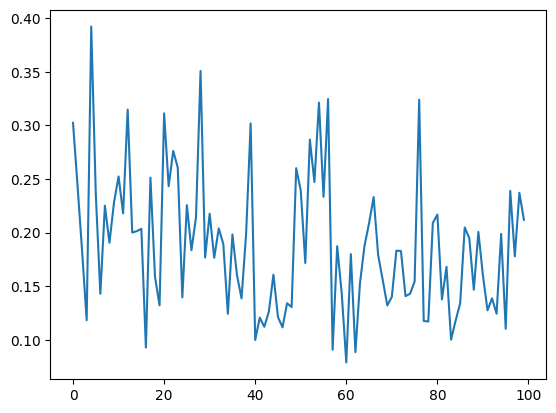

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=range(epochs),y=losses)

In [48]:
with torch.no_grad():
    for batch_idx,(data,target) in enumerate(test_loader):
        output=model(data)
        output=output.round()
        loss_value=loss(output,target)
        print(f"Test Loss {loss_value.item()}")

Test Loss 8.266666412353516


In [49]:
output

tensor([[1., 1., 1.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [1., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output)

0.829

In [51]:
#loss=nn.BCELoss()
loss=nn.BCEWithLogitsLoss()
input_dim=X.shape[1]
hidden_size=64
output_dim=y.shape[1]
model=MultilabelNetwork(input_dim=input_dim,hidden_size=hidden_size,output_dim=output_dim)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
epochs=100
losses=[]
for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss_value=loss(output,target)
        loss_value.backward()
        optimizer.step()
    if epoch%10==0:
        print(f"Epoch {epoch}, Loss {loss_value.item()}")
    losses.append(loss_value.item())
with torch.no_grad():
    for batch_idx,(data,target) in enumerate(test_loader):
        output=model(data)
        output=output.round()
        loss_value=loss(output,target)
        print(f"Test Loss {loss_value.item()}")
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output)
#

Epoch 0, Loss 0.6060874462127686
Epoch 10, Loss 0.5428143739700317
Epoch 20, Loss 0.5629671216011047
Epoch 30, Loss 0.5052409172058105
Epoch 40, Loss 0.5179170370101929
Epoch 50, Loss 0.5251545310020447
Epoch 60, Loss 0.5074695944786072
Epoch 70, Loss 0.5167005062103271
Epoch 80, Loss 0.5213683843612671
Epoch 90, Loss 0.5449160933494568
Test Loss 0.5296913981437683


0.8305

In [53]:
#loss=nn.BCELoss()
loss=nn.BCEWithLogitsLoss()
input_dim=X.shape[1]
hidden_size=64
output_dim=y.shape[1]
model=MultilabelNetwork(input_dim=input_dim,hidden_size=hidden_size,output_dim=output_dim)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.01)
epochs=100
losses=[]
for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss_value=loss(output,target)
        loss_value.backward()
        optimizer.step()
    if epoch%10==0:
        print(f"Epoch {epoch}, Loss {loss_value.item()}")
    losses.append(loss_value.item())
with torch.no_grad():
    for batch_idx,(data,target) in enumerate(test_loader):
        output=model(data)
        output=output.round()
        loss_value=loss(output,target)
        print(f"Test Loss {loss_value.item()}")
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output)
#

Epoch 0, Loss 0.5546923279762268
Epoch 10, Loss 0.4902920722961426
Epoch 20, Loss 0.5070152878761292
Epoch 30, Loss 0.5925009250640869
Epoch 40, Loss 0.518279492855072
Epoch 50, Loss 0.5238797068595886
Epoch 60, Loss 0.5715421438217163
Epoch 70, Loss 0.5338997840881348
Epoch 80, Loss 0.5615274310112
Epoch 90, Loss 0.5720639824867249
Test Loss 0.5317574739456177


0.819

In [54]:
#loss=nn.BCELoss()
loss=nn.BCEWithLogitsLoss()
input_dim=X.shape[1]
hidden_size=64
output_dim=y.shape[1]
model=MultilabelNetwork(input_dim=input_dim,hidden_size=hidden_size,output_dim=output_dim)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.001)
epochs=100
losses=[]
for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss_value=loss(output,target)
        loss_value.backward()
        optimizer.step()
    if epoch%10==0:
        print(f"Epoch {epoch}, Loss {loss_value.item()}")
    losses.append(loss_value.item())
with torch.no_grad():
    for batch_idx,(data,target) in enumerate(test_loader):
        output=model(data)
        output=output.round()
        loss_value=loss(output,target)
        print(f"Test Loss {loss_value.item()}")
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output)
#

Epoch 0, Loss 0.586208164691925
Epoch 10, Loss 0.5384814739227295
Epoch 20, Loss 0.5088555812835693
Epoch 30, Loss 0.5474703311920166
Epoch 40, Loss 0.5670048594474792
Epoch 50, Loss 0.5537481307983398
Epoch 60, Loss 0.5286405086517334
Epoch 70, Loss 0.5215405225753784
Epoch 80, Loss 0.5480901598930359
Epoch 90, Loss 0.5454667806625366
Test Loss 0.5306150913238525


0.8225

In [55]:
y_test_str=[str(i) for i in y_test]

In [56]:
y_test_str

['[1 1 1]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[0 0 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[0 1 0]',
 '[1 1 0]',
 '[0 0 0]',
 '[1 1 1]',
 '[1 1 0]',
 '[0 0 0]',
 '[0 1 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[1 1 1]',
 '[1 1 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 0]',
 '[1 1 1]',
 '[1 1 0]',
 '[0 0 0]',
 '[0 1 0]',
 '[1 0 0]',
 '[0 0 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 0]',
 '[0 0 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[1 0 0]',
 '[1 1 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[0 0 0]',
 '[1 1 0]',
 '[1 0 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 1]',
 '[0 0 0]',
 '[1 1 1]',
 '[0 0 0]',
 '[0 0 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[0 1 0]',
 '[1 1 0]',
 '[1 1 1]',
 '[1 1 0]',
 '[1 1 1]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 1 1]',
 '[1 1 1]',
 '[1 1 1]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 0 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[1 0 0]',
 '[1 1 1]',
 '[0 1 0]',
 '[1 1 0]',
 '[1 1 0]',
 '[0 1 0]',
 '[0 0 0]',
 '[1

In [58]:
from collections import Counter
Counter(y_test_str)

Counter({'[1 1 1]': 416,
         '[1 1 0]': 658,
         '[0 1 0]': 400,
         '[0 0 0]': 306,
         '[1 0 0]': 219,
         '[0 1 1]': 1})

In [63]:
str(Counter(y_test_str).most_common()[0][1]/len(y_test_str)*100)+'%'

'32.9%'